In [1]:
from fastai import *
from fastai.text import *
import numpy as np
import pandas as pd
pd.DataFrame.isna = lambda x : x.isnull()

In [2]:
bs = 64

In [71]:
primos = [0 for i in range(10001)]
def sieve(n): 
    for i in range(2,n+1):
        for k in range(i*2,n+1,i):
            primos[k]=1
sieve(10000)
def is_prime(n):
    return 0 == primos[n]
def get_sec(cant_casos = 8,largo_frase=10,max_vocab=1000):
    t = []
    p = []
    for _ in range(cant_casos):
        n = np.random.randint(2,max_vocab)
        p.append(is_prime(n))
        l = " ".join([str(i+n) for i in range(largo_frase)])
        t.append(l)
    return t,p

def make_data(fname,bs=64):
    t,p = get_sec(bs*600,5,10000)
    data = {'text':t, 'label':p,'is_valid':True}
    df = pd.DataFrame(data)
    df[['label','text','is_valid']].to_csv(fname,index=False)

In [1]:
#data_clas.show_batch(ds_type=DatasetType.Fix)

In [73]:
make_data('win.csv')

In [58]:
df = pd.read_csv('win.csv')

In [67]:
TextLMDataBunch.from_csv??

In [81]:
data_lm = TextLMDataBunch.from_csv('.', 'win.csv',bs=bs,min_freq=1)
data_clas = TextClasDataBunch.from_csv('.', 'win.csv',bs=bs,min_freq=1)

In [85]:
#data.show_batch(ds_type=DatasetType.Valid)
data_clas.show_batch(ds_type=DatasetType.Fix)

text,target
xxbos 9997 9998 xxrep 4 9 1 xxrep 4 0 10001,False
xxbos xxrep 4 9 1 xxrep 4 0 10001 10002 10003,False
xxbos 9997 9998 xxrep 4 9 1 xxrep 4 0 10001,False
xxbos xxrep 4 9 1 xxrep 4 0 10001 10002 10003,False
xxbos 9996 9997 9998 xxrep 4 9 1 xxrep 4 0,False


In [86]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [88]:
learn_lm.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.638691,2.252778,0.669825,00:19
1,2.634474,2.905284,0.589793,00:19
2,2.929096,3.081619,0.587135,00:19
3,2.903450,2.696167,0.640970,00:19
4,2.680084,2.400183,0.686140,00:19
5,2.408859,2.121494,0.727679,00:19
6,2.153991,1.935808,0.762216,00:19
7,1.948428,1.828387,0.788454,00:19
8,1.807039,1.788710,0.800020,00:19
9,1.726694,1.781595,0.802192,00:19


In [89]:
TEXT = "132 133 134 135"
N_WORDS = 30
N_SENTENCES = 1
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.1) for _ in range(N_SENTENCES)))

132 133 134 135 136 xxbos xxbos xxbos 5525 5526 5527 5528 5529 5530 5531 5532 xxbos xxbos 388 389 390 391 392 xxbos xxbos xxbos 957 958 959 960 961 xxbos xxbos 4824


In [90]:
learn_lm.save_encoder('fine_tuned_enc')

In [91]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3) #.to_fp16()

In [92]:
learn_c.load_encoder('fine_tuned_enc')
learn_c.freeze()

In [93]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [94]:
learn_lm.recorder.plot()

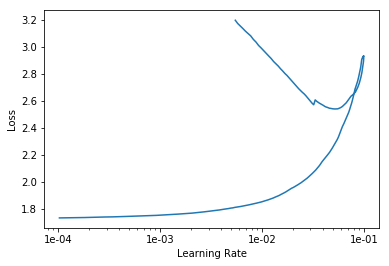

In [95]:
plt.show()

In [96]:
learn_c.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.380910,0.370079,0.876448,00:13
1,0.378378,0.386885,0.876448,00:13
2,0.392496,0.405864,0.876318,00:13
3,0.384573,0.374632,0.876448,00:13
4,0.373125,0.388132,0.876839,00:13
5,0.371655,0.393510,0.876318,00:13
6,0.360011,0.388400,0.876448,00:13
7,0.369017,0.366254,0.876448,00:13
8,0.371815,0.361930,0.876839,00:13
9,0.371142,0.360625,0.876839,00:13


In [97]:
learn_c.predict("132 133 134")

(Category False, tensor(0), tensor([0.8998, 0.1002]))

In [98]:
learn_c.predict("133 134 135")

(Category False, tensor(0), tensor([0.8807, 0.1193]))

In [108]:
learn_c.predict("7 8 9 10 11")

(Category False, tensor(0), tensor([0.8442, 0.1558]))